In [1]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

from pennylane import numpy as np
import pennylane as qml
from pennylane.templates import AngleEmbedding, AmplitudeEmbedding, BasisEmbedding
from pennylane.operation import Tensor
#https://pennylane.readthedocs.io/en/stable/introduction/templates.html

In [2]:
dev1 = qml.device("default.qubit", wires=2)

In [3]:
@qml.qnode(dev1)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    return qml.expval(qml.PauliZ(0)) #0 or 1: Z, + or -: X, +i or -i: Y

## Angle Embedding

In [7]:
pparams = [0.5, 0.3] #b/w 0 and 1
n_qubits = len(pparams) #1 qubit per data point
paulis = []
for i in range(n_qubits):
    paulis.append(qml.PauliZ(i))
print("Qubits:",n_qubits, "\tTensor Product:", Tensor(*paulis))
@qml.qnode(dev1)
def circuit(params):
    AngleEmbedding(params, wires=range(n_qubits))
    return qml.expval(Tensor(*paulis)) # qml.PauliZ(0) @ qml.PauliZ(1)) #<< Tensor Product

Qubits: 2 	Tensor Product: PauliZ(wires=[0]) @ PauliZ(wires=[1])


In [8]:
print(circuit(pparams))

0.8383866435942032


## Amplitude Embedding

In [9]:
dev2 = qml.device("default.qubit", wires=2)
pparams = [1, 2, 3, 7] #input data
pparams = [float(i) for i in pparams] #floatafy
print(pparams)
n_qubits = int(np.log2(len(pparams))) #for 4 data points, u need 2 qubits

print("Qubits:",n_qubits, "\tTensor Product:", Tensor(*paulis))
@qml.qnode(dev2)
def circuit(params):
    AmplitudeEmbedding(params, wires=range(n_qubits), normalize=True)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

[1.0, 2.0, 3.0, 7.0]
Qubits: 2 	Tensor Product: PauliZ(wires=[0]) @ PauliZ(wires=[1])


In [10]:
print(circuit(pparams))

[-0.84126984 -0.68253968]


## Basis Embedding

In [12]:
np.random.seed(8)
n_qubits = 24
dev3 = qml.device("default.qubit", wires=n_qubits)
pparams = [] #input data
for i in range(n_qubits):
    k = 0
    if (random.randint(-100,100) < 0):
        j = random.randint(-70,-30)/100
        p = random.randint(-70,-30)/100
    else:
        j = random.randint(30,70)/100
        p = random.randint(30,70)/100
    if j > 0:
        k = 1
    pparams.append([k, [j, p]])
pprint(pparams[:10])
print("Qubits:",n_qubits)
@qml.qnode(dev3)
def circuit(params):
    BasisEmbedding(params, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

[[0, [-0.45, -0.66]],
 [0, [-0.66, -0.45]],
 [1, [0.36, 0.63]],
 [0, [-0.46, -0.38]],
 [1, [0.6, 0.38]],
 [1, [0.69, 0.58]],
 [0, [-0.4, -0.49]],
 [1, [0.32, 0.43]],
 [0, [-0.37, -0.41]],
 [0, [-0.45, -0.66]]]
Qubits: 24


Text(0, 0.5, 'Y Coord')

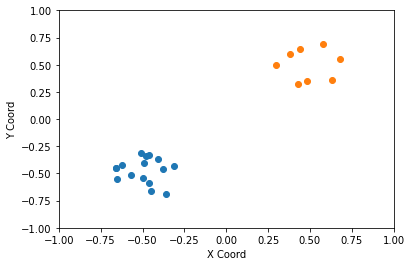

In [13]:
result1 = [i[1][1] for i in pparams if i[0] == 0]
datainput1 = [i[1][0] for i in pparams if i[0] == 0]

result2 = [i[1][1] for i in pparams if i[0] == 1]
datainput2 = [i[1][0] for i in pparams if i[0] == 1]
plt.scatter(result1, datainput1)
plt.scatter(result2, datainput2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('X Coord')
plt.ylabel('Y Coord')

In [14]:
circuit(list(zip(*pparams))[0])

tensor([ 1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
         1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.], requires_grad=True)